# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling and Data Cleaning">2. Data Wrangling and Data Cleaning</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## 1. Introduction

This dataset that we will analyze in this project collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
The project is devided in four sections:1. Introduction, where the dataset has been described and investigation question is set; 2. Data Wrangling and Data Cleaning,where data is moved into dataframe for manipulation, and the data is cleaned, 3. Exploratory Data Analysis, where we explore and visualize the relationship between different variables. 

In [1]:
# Import packages for the data analysis
import pandas as pd
import numpy as np

# Import datetime in order to convert date information string to datetime type
import datetime

# Import packages for the visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset and printing out few lines:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
## shape dataset
len(df)

110527

In [4]:
#General information data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are in total 110527 appointments. Each appointment includes:

 - 'PatientId': Identification of a patient. It is a numerical type (floar64)
 - 'AppointmentID': Identification of each appointment. It is a numerical type (int64)
 - 'Gender': Male or Female
 - 'Scheduled Day’ tells us on what day the patient set up their appointment. It is a string type
 - 'Appointment Day' is the day when the patient really comes for the treatment or consultation. It is a string type
 - 'Age': How old is the patient
 - ‘Neighborhood’ indicates the location of the hospital.
 - ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
 - 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap': True or False
 - 'SMS_received': 1 or more messages sent to the patient.
 - 'No-show':  ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

From the above comands, we can see that we don't have missing value. 
In the following paragraphs we will analyze part of all attributes in order to proceed with the exploration and answer to those questions:

1) Which is the profile of patients?¶ 

2) Which is the age distribution for all patients? 

3) What is the overall appointment show-up vs. no show-up rate? 

4) What is the gender distribution for show / no-show patients? 

5) What is the patient health designation in terms of no-shows vs shows? 

6) What is the Waiting days distributions and in terms of show and no-show?

<a id='wrangling'></a>
## 2. Data Wrangling and Data Cleaning

##### 2.1 PatientID: 

The identification of the patient is originally numerical (float64). So we will trasform it into a string type.

In [5]:
#converting the PatientID from float64 to string type
df["PatientId"] = df["PatientId"].astype(str)

In [6]:
## Counting unique patients are in the dataset:
len(df['PatientId'].unique())

62299

We have 62,299 unique patients which indicates that some patients had more than one appointment.

##### 2.2 AppointmentID: 

The identification of each appointment is originally numerical (int64). So we will trasform it into a string type.

In [7]:
#converting the AppointmentID from int64 to string type
df["AppointmentID"] = df["AppointmentID"].astype(str)

In [8]:
## Counting unique appointmentID are in the dataset:
len(df['AppointmentID'].unique())

110527

In total there are 110527 unique appointment, so we don't have any row duplicated

##### 2.3 Age

In [9]:
#age
df["Age"].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

We found that we have one PatientID with age -1, we decide to  remove it.

In [10]:
#Select the row with age less than 0
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293.0,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
#Delete raw cointains the negative age.
#Identification index raw with the condition age < 0
#Delete this raw with the method drop
df_age_negative = df[df['Age'] < 0] 
df = df.drop(df_age_negative.index, axis=0)

In [12]:
#Test: we are looking for the raw 99832. It has been removed correctly.
df[df['Age']<0] 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


##### 2.4 ScheduledDay and AppointmentDay

Those two columns are related to when the patient scheduled the visit (ScheduledDay) and  which day (AppointmentDay) the patient really comes for the treatment or consultation. Those two attributes are originally string type. In order to calculate how many days have passed between the scheduled day and appointment day, we convert the date information as datetime type.

In [13]:
## Converting the date information in string to datetime type:
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)

In [14]:
## Normalizing columns to keep just the date information
df["ScheduledDay"] = df.ScheduledDay.dt.normalize()
df['AppointmentDay'] = df.AppointmentDay.dt.normalize()

In [15]:
#WaitingDays: how many days have passed between the scheduled day and appointment day
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [16]:
#General info column WaitingDays
df['WaitingDays'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingDays, dtype: float64

There are some days with WaitingDays negative

In [17]:
#Select from the dataframe WaitingDays negative:
df[df["WaitingDays"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
27033,7839272661752.0,5679978,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868.0,5715660,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979.0,5664962,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122.0,5686628,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821.0,5655637,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [18]:
#delete raws with the difference between Appointment and scheduled day is negative
waitingdays_negative = df[df["WaitingDays"] < 0]

In [19]:
df = df.drop(waitingdays_negative.index, axis = 0)

In [20]:
#Test
df[df["WaitingDays"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays


In [21]:
#Test: General information Waiting days
df["WaitingDays"].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingDays, dtype: float64

We transform waiting days in categical values, that we will use in the Exploratory Data Analysis section

In [22]:
#Transform Waiting days in categorical value
## Defining the categories label:
waiting_bin = pd.Series(['Same day: 1', 'Week: 2-7', 'Mid-Month: 8-15', 'Month: 16-30', 'Fourth: 31-90', 'Semester: 91-180'])

In [23]:
df['WaitingDays_bin'] = pd.cut(x = df['WaitingDays'],
                        bins = [-1, 1, 7, 15, 30, 90, 180], 
                        labels = waiting_bin)

In [24]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays,WaitingDays_bin
0,29872499824296.0,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Same day: 1
1,558997776694438.0,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Same day: 1
2,4262962299951.0,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Same day: 1
3,867951213174.0,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Same day: 1
4,8841186448183.0,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Same day: 1


## 3. Exploratory Data Analysis

#### Question 1:  Which is the profile of patients?

In order to answer this question, first of all we check the attribute "Gender". Only two values are expected from this attribute. 

In [25]:
#Count gender attribute 
df["Gender"].value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

The attribute data is consistent, because the total sum is 110521 as the dataframe's shape.

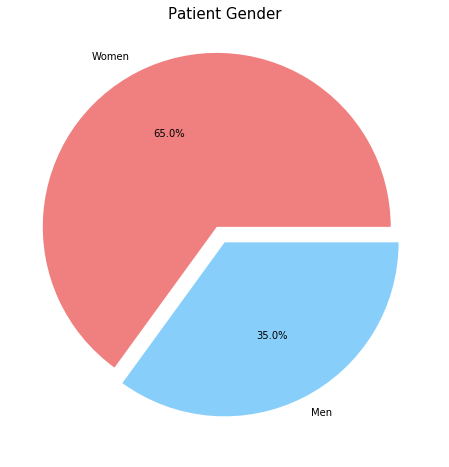

In [27]:
#Pie chart of the Patients
colors = ['lightcoral', 'lightskyblue']

plt.pie([71836, 38685], explode = (0.1, 0), labels = ['Women', 'Men'], colors = colors, autopct='%1.1f%%') 

plt.title('Patient Gender', fontsize=15)
plt.gcf().set_size_inches(8, 8)
plt.show()

The visualization of the gender attribute shows that the 65% of the patients are female.

#### Question 2. Which is the age distribution for all patients?

In [28]:
#information age for patients (female and male)
df[['Gender', 'Age']].groupby('Gender').mean()

,Age
Gender,
F,38.894468
M,33.737443


From the above comand we can see that women patients have as average age 38 years old, while men patients have 33 years old.

#### Question 3: What is the overall appointment show-up vs. no show-up rate?

In [30]:
#Count No-show attribute
df['No-show'].value_counts()

No     88207
Yes    22314
Name: No-show, dtype: int64

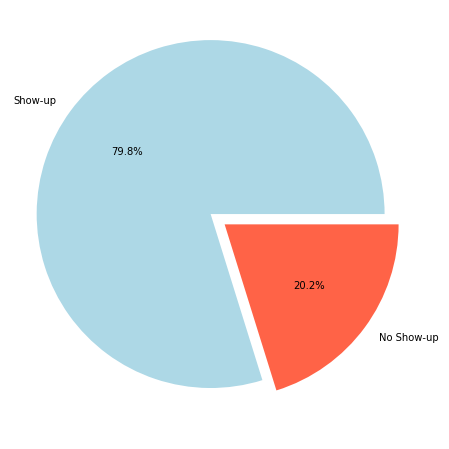

In [38]:
#Pie chart of the show-up
colors = ['lightblue', 'tomato']

plt.pie([88207, 22314], explode = (0.1, 0), labels = ['Show-up', 'No Show-up'], colors = colors, autopct='%1.1f%%') 

plt.title('', fontsize=15)
plt.gcf().set_size_inches(8, 8)
plt.show()

The visualization of the No-show attribute shows that the 20,2% of the patients did not show up appointments.

##### Question 4: What is the gender distribution for show / no-show patients?

We check the gender distribution for show / no-show  patients in order to understand if there are some differences.

In [31]:
#Select gender F/M for No-show == yes and No-show == No
gender_distribution = df.groupby(by='Gender')['No-show'].value_counts()
gender_distribution

Gender  No-show
F       No         57245
        Yes        14591
M       No         30962
        Yes         7723
Name: No-show, dtype: int64

In [34]:
#Total appointments scheduled from female
appointments_women = len(df.loc[df['Gender'] == "F"])
#Total appointments scheduled from men
appointments_men = len(df.loc[df['Gender'] == "M"])

#Total appointment missed from women. (Selection: Gender == F & No-show == Yes (appointment missed))
missed_appointments_women = len(df.loc[(df['Gender'] == "F") & (df['No-show'] == "Yes")])
#Total appointment missed from men. (Selection: Gender == M & No-show == Yes (appointment missed))
missed_appointments_men = len(df.loc[(df['Gender'] == "M") & (df['No-show'] == "Yes")])

# Proportion appointments missed from Females
missed_ratio_women = int(round(missed_appointments_women/(appointments_women + appointments_men) *100))
# Proportion appointments missed from Males
missed_ratio_men = int(round(missed_appointments_men/(appointments_men + appointments_women) *100))

print('Total appointments {} made by females, {} were missed with the ratio of {}%.'.format(appointments_women, missed_appointments_women, missed_ratio_women))
print('Total appointments {} made by males, {} were missed with the ratio of {}%.'.format(appointments_men, missed_appointments_men, missed_ratio_men))


Total appointments 71836 made by females, 14591 were missed with the ratio of 13%.
Total appointments 38685 made by males, 7723 were missed with the ratio of 7%.


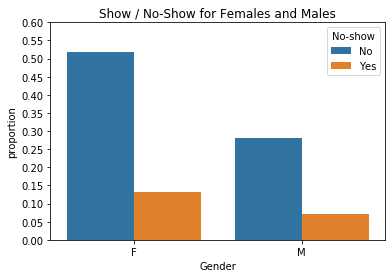

In [35]:
# Visuaization proportion appointments missed from women and men

#Total appointments
n_points = df.shape[0]

#Count appointments made from women and men
max_count = df['Gender'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

bar = sns.countplot(x=df['Gender'], hue=df['No-show'], data=df)
bar.set_title("Show / No-Show for Females and Males")
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.show();

From the total appointments missed, 13% are female patients, while 7% are male patients.

##### Question 5: What is the patient health designation in terms of no-shows vs shows

In order to answer to this question, we create 2 new dataframe, with the condition
1) No-show == No, where we select only patients that showed up to their appointments.
2) No-show == Yes, where we select only patients that didn't show up   to their appointments.

And from those new dataframe, we calculate the proportion on patient health designation in terms of Alcoholism, Hipertension, Diabetes, Handcap

In [36]:
#Create a dataframe to hold all show records
#‘No’ if the patient showed up to their appointment
show = df[df["No-show"] == 'No']
show.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays,WaitingDays_bin
0,29872499824296.0,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Same day: 1
1,558997776694438.0,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Same day: 1
2,4262962299951.0,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Same day: 1
3,867951213174.0,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Same day: 1
4,8841186448183.0,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Same day: 1


In [37]:
#Create a dataframe to hold all no-show records
#‘Yes’ if they did not show up
no_show = df[df["No-show"] == 'Yes']
no_show.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays,WaitingDays_bin
6,733688164476661.0,5630279,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,Week: 2-7
7,3449833394123.0,5630575,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,Week: 2-7
11,7542951368435.0,5620163,M,2016-04-26 00:00:00+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3,Week: 2-7
17,14794966191172.0,5633460,F,2016-04-28 00:00:00+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes,1,Same day: 1
20,622257462899397.0,5626083,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2,Week: 2-7


In [39]:
# Total Shows patients with problems with Alcoholism, Handcap, Hipertension and Diabetes
shows_by_health = show.loc[(show.Alcoholism == 1) | (show.Handcap == 1) | (show.Hipertension == 1) | (show.Diabetes == 1)]
total_show = shows_by_health.shape[0]
total_show

21603

In [40]:
#Total No-Show patients with problems with Alcoholism, Handcap, Hipertension and Diabetes
no_shows_by_health = no_show.loc[(no_show.Alcoholism == 1) | (no_show.Handcap == 1) | (no_show.Hipertension == 1) | (no_show.Diabetes == 1)]
total_no_show = no_shows_by_health.shape[0]
total_no_show

4698

In [41]:
# Total Alcoholism for people that show up appointments
df_alc2 = show.query('Alcoholism == "1"')
dfa2 = df_alc2.shape[0]
dfa2

# Total Alcoholism for people that did not show up appointments
df_alc3 = no_show.query('Alcoholism == "1"')
dfa3 = df_alc3.shape[0]
dfa3

# Percentual Alcolist patients showed up to their appointment:
Alcoholism_show = float(dfa2 /total_show * 100)
print('Percentual Alcolist patients showed up to their appointment: ', Alcoholism_show)

# Percentual Alcolist patients did not show up to their appointment:
Alcoholism_no_show = float(dfa3 /total_no_show * 100)
print('Percentual Alcolist patients did not show up to their appointment: ', Alcoholism_no_show)

Percentual Alcolist patients showed up to their appointment:  12.41957135583021
Percentual Alcolist patients did not show up to their appointment:  14.410387398893146


In [42]:
# Total Hipertension for people that show up appointments
df_hiper2 = show.query('Hipertension == "1"')
dfhiper2 = df_hiper2.shape[0]
dfhiper2

# Total Hipertension for people that did not show up appointments
df_hiper3 = no_show.query('Hipertension == "1"')
dfhiper3 = df_hiper3.shape[0]
dfhiper3

# Proportion Hipertension patients showed up to their appointment:
Hipertension_show = float(dfhiper2 /total_show * 100)
print('Percentual Hipertension patients showed up to their appointment: ', Hipertension_show)

# Percentual Hipertension patients did not show up to their appointment:
Hipertension_no_show = float(dfhiper3 /total_no_show * 100)
print('Percentual Hipertension patients did not show up to their appointment: ', Hipertension_no_show)

Percentual Hipertension patients showed up to their appointment:  83.45600148127575
Percentual Hipertension patients did not show up to their appointment:  80.28948488718603


In [43]:
#Total Diabetes for people that show up appointments
df_diab2 = show.query('Diabetes == "1"')
dfdiab2 = df_diab2.shape[0]
dfdiab2

# Total Diabetes for people that did not show up appointments
df_diab3 = no_show.query('Diabetes == "1"')
dfdiab3 = df_diab3.shape[0]
df_diab3

# Proportion Diabetes patients showed up to their appointment:
Diabetes_show = float(dfdiab2 /total_show * 100)
print('Percentual Diabetes patients show up to their appointment: ', Diabetes_show)

# Percentual Diabetes patients did not show up to their appointment:
Diabetes_no_show = float(dfdiab3 /total_no_show *100)
print('Percentual Diabetes patients did not show up to their appointment: ', Diabetes_no_show)

Percentual Diabetes patients show up to their appointment:  30.14859047354534
Percentual Diabetes patients did not show up to their appointment:  30.43848446147297


In [45]:
#Total Handcap for people that show up appointments
df_hand2 = show.query('Handcap == "1"')
dfhand2 = df_hand2.shape[0]
dfhand2

# Total Handcap for people that did not show up appointments
df_hand3 = no_show.query('Handcap == "1"')
dfhand3 = df_hand3.shape[0]
df_hand3

# Proportion Handcap patients showed up to their appointment:
Handcap_show = float(dfhand2 /total_show *100)
print('Percentual Handcap patients show up to their appointment: ', Handcap_show)

# Percentual Handcap patients did not show up to their appointment:
Handcap_no_show = float(dfhand3 /total_no_show * 100)
print('Percentual Handcap patients did not show up to their appointment: ', Handcap_no_show)

Percentual Handcap patients show up to their appointment:  7.758181734018424
Percentual Handcap patients did not show up to their appointment:  7.747977862920391


#####  Question 7: What is the Waiting days distributions and in terms of show and no-show?

We analyzed:
1) the distribution of waiting days, 
2) the mean value of waiting days for no-show and show
3) the mean value of waiting days for no-show and show in terms of different waiting days categorical value (Same day: 1, Week: 2-7, Mid-Month: 8-15, Month: 16-30, Fourth: 31-90, Semester: 91-180.

Text(0, 0.5, 'Count')

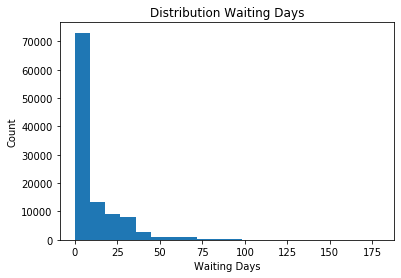

In [47]:
#Histogram: Distribution waiting days
plt.hist(df['WaitingDays'], bins = 20)
plt.title("Distribution Waiting Days")
plt.xlabel("Waiting Days")
plt.ylabel("Count")

In [54]:
print('Mean:', np.mean(df["WaitingDays"]))

Mean: 10.184345056595578


In [52]:
waitingdays = df.groupby(by='No-show')['WaitingDays'].mean()
waitingdays

No-show
No      8.754759
Yes    15.835484
Name: WaitingDays, dtype: float64

In [49]:
waitingdays_bin = df.groupby(by=['WaitingDays_bin', 'No-show'])['WaitingDays'].describe()
waitingdays_bin

count        mean        std   min   25%    50%  \
WaitingDays_bin  No-show                                                      
Same day: 1      No       40870.0    0.100318   0.300427   0.0   0.0    0.0   
                 Yes       2905.0    0.383133   0.486234   0.0   0.0    0.0   
Week: 2-7        No       20313.0    4.341112   1.818132   2.0   2.0    4.0   
                 Yes       6659.0    4.443460   1.834201   2.0   3.0    4.0   
Mid-Month: 8-15  No        9362.0   11.511750   2.477960   8.0   9.0   12.0   
                 Yes       4166.0   11.682189   2.451803   8.0   9.0   12.0   
Month: 16-30     No       10709.0   22.744887   4.389377  16.0  19.0   22.0   
                 Yes       5159.0   22.695484   4.237167  16.0  19.0   22.0   
Fourth: 31-90    No        6792.0   45.550942  14.327287  31.0  34.0   40.0   
                 Yes       3369.0   44.455625  13.673314  31.0  34.0   39.0   
Semester: 91-180 No         161.0  119.378882  31.185723  91.0  91.0  108.0   
                 Yes         56.0  127.250000  31.652804  91.0  97.5  129.0   

                            75%    max  
WaitingDays_bin  No-show                
Same day: 1      No         0.0    1.0  
                 Yes        1.0    1.0  
Week: 2-7        No         6.0    7.0  
                 Yes        6.0    7.0  
Mid-Month: 8-15  No        14.0   15.0  
                 Yes       14.0   15.0  
Month: 16-30     No        27.0   30.0  
                 Yes       27.0   30.0  
Fourth: 31-90    No        56.0   90.0  
                 Yes       52.0   90.0  
Semester: 91-180 No       142.0  179.0  
                 Yes      155.0  179.0

## Conclusions

In this project we analyze the following questions: 

1) Which is the profile of patients?¶
We can see there are un unbalance: the 65% of patients are females, and 35% are males.

2) Which is the age distribution for all patients?
We can see that women patients have as average age 38 years old, while men patients have 33 years old.

3)  What is the overall appointment show-up vs. no show-up rate?
From the total appointments scheduled, the 20,2% patients didn't show up.

4) What is the gender distribution for show / no-show patients?
From this anaalysis, we found that from thee total appointment missed, the 13% are female patients, and the 7% are males.

5) What is the patient health designation in terms of no-shows vs shows?
With this question we didnàt foudn't relavant peculiarity: the patient profile in terms of helth designation is almost the same.

6) What is the Waiting days distributions and in terms of show and no-show?
We found that the waiting days between scheduled and appointment days are different for show up and missed appointments: the mean value for show up appointments is 8 days, while for missed appointments is 15 days. 

   
    